In [1]:
import torch
import sklearn
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import requests
from pathlib import Path
import xml.etree.ElementTree as ET
from PIL import Image

# This is to test if the model is working(fwd pass)

In [2]:
from models.UVixLSTM_Att import UVixLSTM_Att
sample_input = torch.randn(8, 3, 256, 256)  
model = UVixLSTM_Att(class_num=1, img_dim = 256, in_channels=3)

output = model(sample_input)

print(f'Output shape: {output.shape}')

/mnt/data2/sohum/miniconda3/envs/cmu_cell_seg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Output shape: torch.Size([8, 1, 256, 256])


# This is inspecting the dictionary being fed to the model

In [3]:
import numpy as np

# Load the data dictionary
data = np.load('./Data/pannuke.npy', allow_pickle=True).item()

# Print the length of each key's value
for key, value in data.items():
    if isinstance(value, list):
        print(f"Key: {key}, Length: {len(value)}")
    else:
        print(f"Key: {key}, Value: Not a list (type: {type(value)})")


Key: original_image, Length: 2656
Key: mask, Length: 2656
Key: aug_images, Length: 31872
Key: aug_masks, Length: 31872
Key: train_patched_images, Length: 27091
Key: train_patched_masks, Length: 27091
Key: val_patched_images, Length: 2549
Key: val_patched_masks, Length: 2549
Key: test_patched_images, Length: 2232
Key: test_patched_masks, Length: 2232


# Visualizing any images and masks

In [6]:
number_img = 20000

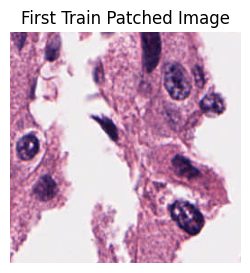

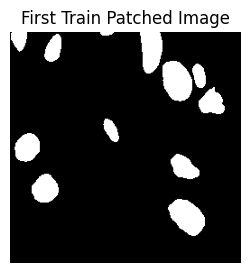

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data dictionary
data = np.load('./Data/pannuke.npy', allow_pickle=True).item()

# Get the train patched images
train_patched_images = data.get('train_patched_images', [])
train_patched_masks = data.get('train_patched_masks', [])

# Check if images exist and display the first one
if train_patched_images:
    first_image = train_patched_images[number_img]
    # print(first_image.shape)
    plt.figure(figsize=(3, 3))
    plt.imshow(first_image, cmap='gray')  # Adjust cmap if needed
    plt.title('First Train Patched Image')
    plt.axis('off')
    plt.show()

    first_mask = train_patched_masks[number_img]
    # print(first_image.shape)
    plt.figure(figsize=(3, 3))
    plt.imshow(first_mask, cmap='gray')  # Adjust cmap if needed
    plt.title('First Train Patched Image')
    plt.axis('off')
    plt.show()

else:
    print("No images found under the key 'train_patched_images'.")


In [64]:
print(len(train_patched_images))

2257


In [5]:
data = np.load('./Data/pannuke_fold1_0255_try-.npy', allow_pickle=True).item()

# Get the train patched images
train_patched_images = data.get('train_patched_images', [])
train_patched_masks = data.get('train_patched_masks', [])

In [6]:
train_patched_masks[1]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

DOWNLOAD IMAGES FROM PATHML NPY

In [ ]:
file_path = '/mnt/data2/sohum/datasets/panuke/Fold_2s'
for file in os.listdir(file_path):
    print(file)